<a href="https://colab.research.google.com/github/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Taller%204/Taller%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

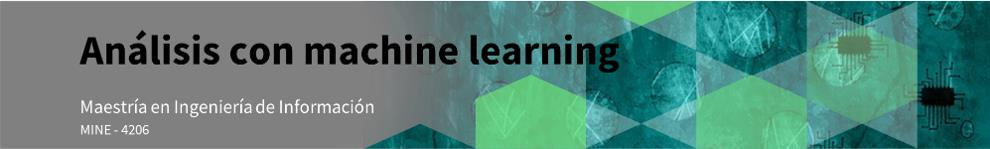

* **Integrante 1:** Deivis Vergel
* **Integrante 2:** Yeimy Andrea Cano
* **Integrante 3:** Alejandro Garcia Flores, 201326489

## **ENTENDIMIENTO DEL NEGOCIO**

### Objetivo general: 

 

Crear un sistema de recomendación usando algoritmos de Machine Learning para los estudiantes de la universidad basado en la probabilidad de ser aceptado en un cupo dado, teniendo en cuenta su programa académico, GPA, nivel de idiomas, capacidad económica e intereses de destino. 

### 0. Entendimiento del problema y los datos

Fuente de los datos y descripción inicial de los datos. 

La base de datos de movilidad y convenios de La Dirección de Internacionalización (MoveON) que está a cargo de Alejandro Garcia Flores, fue obtenida con permiso de la directora de internacionalización. La base de datos fue exportada de MoveOn en formato Excel. Esta cuenta con 4 tablas que se utilizaran en el proyecto; 



1.   Instituciones Externas (2289 registros): 

 *   Nombre de la institución. Campo de texto introducido por los gestores de relaciones externas de la dirección. 
 
 * Ciudad. Campo de texto introducido por los gestores de relaciones externas de la dirección. 

 * País: Campo de texto introducido por los gestores de relaciones externas de la dirección. 

 * Institution ID: Campo numérico entero generado automáticamente al crear una nueva institución. 

 * GPA/4: Campo decimal introducido por los gestores de movilidad en donde se indica el promedio mínimo sobre 4 para un intercambio con esta institución. 

 * Language Requierment 1: Campo de texto introducido por los gestores de movilidad en donde se indica el primer posible idioma exigido por la institución para poder realizar un intercambio. 

 * Lenguage CERF score 1: Campo de texto introducido por los gestores de movilidad en donde se indica el puntaje CERF mínimo exigido en el primer idioma por la institución para poder realizar un intercambio. 

 * Language Requierment 2: Campo de texto introducido por los gestores de movilidad en donde se indica el segundo posible idioma exigido por la institución para poder realizar un intercambio. 

 * Lenguage CERF score 2: Campo de texto introducido por los gestores de movilidad en donde se indica el puntaje CERF mínimo exigido en el primer segundo idioma por la institución para poder realizar un intercambio. 



2. Stay Opportunities: Esta tabla describe los posibles intercambios que un estudiante puede realizar y por medio de cuales convenios los puede realizar. (2008 registros) 
 * Nombre: Campo de texto introducido por los gestores de relaciones externas de la dirección que describe el nombre de la oportunidad de intercambio. 

 * Direction: Campo de texto introducido por los gestores de relaciones externas de la dirección que describe la dirección del intercambio (Entrante o saliente). 

 * Parent Relation: ID entero del convenio padre del cual se generó la oportunidad de intercambio. 

 * Degree Program: Lista separada por comas de los programas que pueden hacer uso de la oportunidad de intercambio. 

 * Level: nivel académico por el cual se puede realizar el intercambio. (Undergraduate, Máster o PhD) 

 * External institution: ID de la institución con la cual se realiza el intercambio por medio de la oportunidad de intercambio. 

 * Status:  

    1. Active: la oportunidad de intercambio se encuentra abierta en una convocatoria. 
    2. Silent: la oportunidad de intercambio se encuentra disponible pero no esta siendo usada en una convocatoria en este momento. 
    3. Terminated o Cancelled: la oportunidad de intercambio ya no puede ser utilizada. 

3. Seats: Esta tabla describe los cupos que se abren semestralmente para las Stay Opportunites desde 201820 hasta 20220: 

 * Relation Name: nombre de la Stay Opportunity a la cual se le están asignando los cupos. 

 * Academic year: año al cual aplican los cupos. 

 * Academic Period: semestre al cual aplican los cupos. 

 * Number: número de cupos que se abrieron. 

 * Remaing seats: número de cupos sin asignar. 

4. Stay Wishes: postulaciones para intercambios salientes de la universidad de los andes desde 21820 hasta 20220. (8154 registros) cada uno tiene los siguientes datos: 

 * Stay Wish ID: Identificador numérico entero de la postulacion a una universidad especifica. 

 * Stay ID: identificador numérico entero del intercambio al cual la postulacion esta vinculada 

 * Person ID: identificador numérico entero de la persona que realizo la postulacion generado por MoveON de manera automática.  

 * Rank: Prioridad dada por el estudiante al momento de realizar la postulación. Un estudiante puede postularse a 3 universidades diferentes en una sola aplicación, cada una crea un registro único en el sistema, pero todas se vinculan al mismo intercambio. Si el estudiante es rechazado en las primeras 3 postulaciones, puede realizar 3 postulaciones adicionales y todas quedan vinculadas a el mismo intercambio (Stay ID). 

 * Stay Oportunity ID: identificador numérico entero de la oportunidad de intercambio al cual el estudiante aplico. 

 * Form: Nombre de la convocatoria a la cual aplico. 

 * Start Period: Semestre en el cual comienza el intercambio. 

 * Academic Year: Año en el cual comienza el intercambio. 

 * Status Selection: Estado en el cual se encuentra la postulación: 

        1. Pending: estado inicial en el cual no se ha tomado ninguna decisión sobre la postulación. 

        1. Selected: una vez se han revisado las postulaciones, si se le otorga el cupo al estudiante en una institución especifica se le da este estado a la postulación en la cual se le otorgo el cupo. Solo 1 de las 3-6 postulaciones de un estudiante en una convocatoria dada pude tener este estado. 
        1. Rejected: estado que se le otorga a las postulaciones rechazadas por el equipo de movilidad de la universidad.  

        1. Cancelled: estado que se le otorga a una postulación si el estudiante decide cancelar el cupo antes de iniciar el intercambio. 

 * Status Offer: estado el cual establece si el estudiante acepto el cupo otorgado en una postulación: 

        1. Make Offer: se esta esperando a que el estudiante responda. 

        1. No offer: el estudiante fue rechazado por la universidad de los andes. 

        1. Offer rejected: el estudiante rechazo el cupo. 

        1. Offer acepted: el estudiante acepto el cupo y se formaliza el intercambio. 
 * Stay: GPA: Promedio del estudiante. 

 * Level: nivel académico del estudiante por el cual se postuló. (Undergraduate, Máster o PhD) 

 * Degree program: programa académico del estudiante por el cual se postuló. 

 * Stay: Idioma 1: Primer idioma por el cual realiza el requerimiento de lenguaje del intercambio. 

 * Stay: Examen 1: Examen presentado para certificar la proficiencia del primer idioma. 

 * Stay: Calificación total examen 1: Calificación total del primer examen de idioma presentado para el intercambio. 

 * Stay: Idioma 2: segundo idioma por el cual realiza el requerimiento de lenguaje del intercambio. 

 * Stay: Examen 2: Examen presentado para certificar la proficiencia del segundo idioma. 

 * Stay: Calificación total examen 2: Calificación total del segundo examen de idioma presentado para el intercambio. 

 * Stay: Idioma 3: tercer idioma por el cual realiza el requerimiento de lenguaje del intercambio. 

 * Stay: Examen 3: Examen presentado para certificar la proficiencia del tercer idioma. 

 * Stay: Calificación total examen 3: Calificación total del tercer examen de idioma presentado para el intercambio. 

 * Stay: Status: Resultado final del intercambio: 

    1. Completed: el estudiante realizo el intercambio y lo finalizo exitosamente. 
    1. Cancelled: el estudiante cancelo el intercambio. 
    1. Not Accepted: el estudiante fue rechazado. 
    1. Interrupted: el estudiante interrumpió el intercambio mientras se encontraba de viaje. 
    1. Planned: el estudiante formalizo el intercambio y esta esperando a que inicie. 
    1. New registration: el intercambio se encuentra en procesamiento. 

 * Country: País al cual el estudiante se está postulando 
 * Institución: Institución externa al cual el estudiante se está postulando. 

In [1]:
!pip install pattern
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install markupsafe==2.0.1

     |████████████████████████████████| 22.2 MB 1.3 MB/s 
     |████████████████████████████████| 87 kB 7.4 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 5.6 MB 35.0 MB/s 
     |████████████████████████████████| 5.6 MB 49.5 MB/s 
     |████████████████████████████████| 419 kB 55.0 MB/s 
     |████████████████████████████████| 104 kB 61.9 MB/s 
     |████████████████████████████████| 3.6 MB 36.1 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=a6baf56b2a7a51bb431b142bf675297c25a012ea8284d5374e2ebd78c8d3ce9a
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.1.0-cp37-cp37m-linux_x86_64.whl size=99963 sha256=76bd37e5ea2d147b4ecbb5c29f23f5edf2cdb497451ad7dee52f1dd206035518
  Stored in directory: /root/.cache/pip/wheels/97/d4/df/08cd6e1fa4a8691b268ab254bd0fa589827ab5b65638c010b4
  

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import os.path as osp
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

### Importación de datos

In [3]:
from google.colab import drive
drive.mount('/Proyecto_ML')

Mounted at /Proyecto_ML


In [4]:
url = "/Proyecto_ML/MyDrive/Proyecto ML/AcademicMoveWishesOutgoing (Mon May 16 2022).xlsx"

data = pd.read_excel(url)
data.head()

,Stay wish: ID,Relation: ID,Status selection,Stay: ID,Person: ID,Form,Start period,Rank,Status offer,Country,...,Stay: Calificación total 1,Stay: Calificación total 2,Stay: Examen 1,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: Examen 3,Stay: Calificación total 3,Stay: GPA outgoing,Stay: Examen 2
0,3978.0,2053.0,Cancelled,11199.0,11131.0,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,NaN,United States,...,98,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN
1,3990.0,2053.0,Cancelled,11204.0,11132.0,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,NaN,United States,...,"6,5",NaN,IELTS,English,NaN,NaN,NaN,NaN,NaN,NaN
2,3994.0,2053.0,Rejected,11207.0,11133.0,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,NaN,United States,...,111,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN
3,3998.0,2053.0,Cancelled,11209.0,11135.0,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,NaN,United States,...,102,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN
4,4000.0,2053.0,Rejected,11210.0,3989.0,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,NaN,United States,...,8,NaN,IELTS,English,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

lb_make = LabelEncoder()
data_clean = data
data_clean.drop('Stay wish: ID', inplace=True, axis=1)
data_clean.drop(["Stay: Calificación total 1"], inplace=True, axis=1)
data_clean.drop(["Stay: Calificación total 2"], inplace=True, axis=1)
data_clean.drop(["Stay: Calificación total 3"], inplace=True, axis=1)
data_clean["Status selection"] = lb_make.fit_transform(data["Status selection"])
data_clean["Status offer"] = lb_make.fit_transform(data["Status offer"])
data_clean["Form"] = lb_make.fit_transform(data["Form"])
data_clean["Start period"] = lb_make.fit_transform(data["Start period"])
data_clean["Country"] = lb_make.fit_transform(data["Country"])
data_clean["Stay: Examen 1"] = lb_make.fit_transform(data["Stay: Examen 1"])
data_clean["Stay: Idioma 1"] = lb_make.fit_transform(data["Stay: Idioma 1"])
data_clean["Stay: Idioma 2"] = lb_make.fit_transform(data["Stay: Idioma 2"])
data_clean["Stay: Idioma 3"] = lb_make.fit_transform(data["Stay: Idioma 3"])
data_clean["Stay: Examen 3"] = lb_make.fit_transform(data["Stay: Examen 3"])
data_clean["Stay: Examen 2"] = lb_make.fit_transform(data["Stay: Examen 2"])
data_clean["Institution"] = lb_make.fit_transform(data["Institution"])
data_clean["Level"] = lb_make.fit_transform(data["Level"])
data_clean["Stay: Status"] = lb_make.fit_transform(data["Stay: Status"])
data_clean["Stay: Degree programme"] = lb_make.fit_transform(data["Stay: Degree programme"])
data_clean["Stay: GPA outgoing"]=data["Stay: GPA outgoing"].str.replace(',','.').astype(float)
data_clean = data_clean.fillna(0)
data_clean

,Relation: ID,Status selection,Stay: ID,Person: ID,Form,Start period,Rank,Status offer,Country,Institution,...,Academic year,Stay: Status,Stay: Degree programme,Stay: Examen 1,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: Examen 3,Stay: GPA outgoing,Stay: Examen 2
0,2053.0,0,11199.0,11131.0,45,2,2.0,4,35,221,...,2020.0,5,66,8,2,9,6,8,0.00,9
1,2053.0,0,11204.0,11132.0,45,2,2.0,4,35,221,...,2020.0,5,66,5,2,9,6,8,0.00,9
2,2053.0,2,11207.0,11133.0,45,2,2.0,4,35,221,...,2020.0,1,2,8,2,9,6,8,0.00,9
3,2053.0,0,11209.0,11135.0,45,2,2.0,4,35,221,...,2020.0,5,66,8,2,9,6,8,0.00,9
4,2053.0,2,11210.0,3989.0,45,2,2.0,4,35,221,...,2020.0,1,11,5,2,9,6,8,0.00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9071,998.0,1,20627.0,18992.0,109,5,3.0,4,30,65,...,2023.0,4,0,9,8,1,6,8,4.23,5
9072,1100.0,3,12633.0,12933.0,57,8,1.0,0,35,24,...,2020.0,0,56,8,2,9,6,8,3.80,9
9073,1024.0,3,11593.0,11679.0,63,14,1.0,2,21,143,...,2021.0,0,66,8,2,9,6,8,4.18,9
9074,136.0,2,11593.0,11679.0,63,13,2.0,4,31,96,...,2020.0,0,66,8,2,9,6,8,4.18,9


In [6]:
ProfileReport(data_clean,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se realiza la división de datos para entrenamiento y validación.

In [7]:
train, test = train_test_split(data_clean, test_size=0.2, random_state=33)
train.head()

,Relation: ID,Status selection,Stay: ID,Person: ID,Form,Start period,Rank,Status offer,Country,Institution,...,Academic year,Stay: Status,Stay: Degree programme,Stay: Examen 1,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: Examen 3,Stay: GPA outgoing,Stay: Examen 2
5950,747.0,2,2484.0,2958.0,15,11,2.0,1,31,92,...,2018.0,0,66,5,9,9,6,8,3.84,9
7683,948.0,2,11830.0,11904.0,63,13,3.0,4,35,234,...,2020.0,0,66,8,2,9,6,8,4.04,9
8311,0.0,1,8193.0,9020.0,23,7,1.0,4,35,24,...,2019.0,5,13,5,2,9,6,8,4.79,9
2765,342.0,2,15091.0,14654.0,79,14,1.0,4,30,208,...,2021.0,1,20,8,2,9,6,8,4.21,9
3464,503.0,2,3560.0,4085.0,27,1,3.0,1,13,34,...,2019.0,1,66,8,2,9,6,8,3.93,9


In [8]:

X_train, y_train = train.drop(['Status selection'],axis=1), train['Status selection'] 
display(X_train)
y_train

,Relation: ID,Stay: ID,Person: ID,Form,Start period,Rank,Status offer,Country,Institution,Level,Academic year,Stay: Status,Stay: Degree programme,Stay: Examen 1,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: Examen 3,Stay: GPA outgoing,Stay: Examen 2
5950,747.0,2484.0,2958.0,15,11,2.0,1,31,92,2,2018.0,0,66,5,9,9,6,8,3.84,9
7683,948.0,11830.0,11904.0,63,13,3.0,4,35,234,1,2020.0,0,66,8,2,9,6,8,4.04,9
8311,0.0,8193.0,9020.0,23,7,1.0,4,35,24,1,2019.0,5,13,5,2,9,6,8,4.79,9
2765,342.0,15091.0,14654.0,79,14,1.0,4,30,208,1,2021.0,1,20,8,2,9,6,8,4.21,9
3464,503.0,3560.0,4085.0,27,1,3.0,1,13,34,2,2019.0,1,66,8,2,9,6,8,3.93,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,89.0,8456.0,9373.0,50,2,3.0,2,23,63,1,2020.0,1,66,8,2,9,6,8,3.87,9
578,0.0,9197.0,9667.0,22,7,1.0,4,35,124,1,2019.0,1,8,8,2,9,6,8,4.06,9
5848,887.0,8536.0,9439.0,50,2,1.0,4,9,56,1,2020.0,1,13,5,2,9,6,8,3.86,9
2439,57.0,20971.0,19301.0,109,5,2.0,4,12,31,1,2023.0,4,0,6,2,9,6,8,3.89,9


5950    2
7683    2
8311    1
2765    2
3464    2
       ..
57      3
578     1
5848    2
2439    1
7188    1
Name: Status selection, Length: 7260, dtype: int64

## **MODELAMIENTO**

### **Modelo usando multinomial Naive Bayes**

In [9]:
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

In [10]:
test3 = test
y_pred_train_MB = naive.predict(X_train)
y_pred_test_MB = naive.predict(test3.drop(['Status selection'],axis=1))
y_pred_test_MB

array([2, 4, 2, ..., 2, 0, 3])

In [11]:
report_MB1 = classification_report(y_train, y_pred_train_MB)

print("Train Report for Multinomial Bayes\n", report_MB1)

report_test_MB = classification_report(test["Status selection"], y_pred_test_MB)

print("Test Report for Multinomial Bayes\n", report_test_MB)

Train Report for Multinomial Bayes
               precision    recall  f1-score   support

           0       0.03      0.14      0.05       193
           1       0.38      0.25      0.30      2091
           2       0.54      0.32      0.41      3359
           3       0.28      0.33      0.30      1616
           4       0.00      1.00      0.00         1

    accuracy                           0.30      7260
   macro avg       0.25      0.41      0.21      7260
weighted avg       0.42      0.30      0.34      7260

Test Report for Multinomial Bayes
               precision    recall  f1-score   support

           0       0.02      0.09      0.03        43
           1       0.36      0.23      0.28       504
           2       0.58      0.33      0.42       886
           3       0.24      0.32      0.27       383
           4       0.00      0.00      0.00         0

    accuracy                           0.30      1816
   macro avg       0.24      0.20      0.20      1816
weight

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Modelo usando KNeighborsClassifier**

In [12]:
 kneighbors = KNeighborsClassifier()
 kneighbors.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred_train_MB = kneighbors.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
               precision    recall  f1-score   support

           0       0.47      0.26      0.33       193
           1       0.76      0.81      0.78      2091
           2       0.70      0.85      0.76      3359
           3       0.67      0.34      0.45      1616
           4       0.00      0.00      0.00         1

    accuracy                           0.71      7260
   macro avg       0.52      0.45      0.47      7260
weighted avg       0.70      0.71      0.69      7260



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Buscando hiperparametros de KNN

In [14]:

estimators = [
        ('classifier', KNeighborsClassifier())          
    ]

pipeKN = Pipeline(estimators)
pipeKN.fit(X_train, y_train)

parameters = {
              'classifier__n_neighbors':[4,5,10,20,30]
            }

grid_search_kn = GridSearchCV(pipeKN, parameters, scoring='recall', cv=5, error_score=0.0)

In [15]:
grid_search_kn.fit(X_train,y_train)
best_model_KN = grid_search_kn.best_estimator_
grid_search_kn.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0.0. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_

{'classifier__n_neighbors': 4}

In [16]:
y_pred_train_KN = best_model_KN.predict(X_train)
report_KN = classification_report(y_train, y_pred_train_KN)
print("Train Report for kneighbors\n", report_KN)

y_pred_test_KN = best_model_KN.predict(test.drop(['Status selection'],axis=1))
report_test_MB = classification_report(test["Status selection"], y_pred_test_KN)
print("Test Report for kneighbors\n", report_test_MB)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Report for kneighbors
               precision    recall  f1-score   support

           0       0.48      0.31      0.38       193
           1       0.79      0.84      0.81      2091
           2       0.70      0.87      0.78      3359
           3       0.69      0.31      0.43      1616
           4       0.00      0.00      0.00         1

    accuracy                           0.72      7260
   macro avg       0.53      0.47      0.48      7260
weighted avg       0.72      0.72      0.70      7260

Test Report for kneighbors
               precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.65      0.71      0.68       504
           2       0.65      0.77      0.70       886
           3       0.34      0.17      0.22       383

    accuracy                           0.61      1816
   macro avg       0.47      0.44      0.44      1816
weighted avg       0.57      0.61      0.58      1816



### **Modelo usando Regresión Logística**



In [17]:
regresion = LogisticRegression()
regresion.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [18]:
y_pred_train_LR = regresion.predict(X_train)
y_pred_train_LR

array([2, 2, 2, ..., 2, 2, 2])

In [19]:
report_LR = classification_report(y_train, y_pred_train_LR)

print("Train Report for Logistic Regression\n", report_LR)

Train Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.44      0.18      0.26      2091
           2       0.49      0.93      0.64      3359
           3       0.20      0.00      0.00      1616
           4       0.00      0.00      0.00         1

    accuracy                           0.48      7260
   macro avg       0.23      0.22      0.18      7260
weighted avg       0.40      0.48      0.37      7260



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Modelo usando Random Forest**

In [20]:
random = RandomForestClassifier(random_state=0)
random.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [21]:
y_pred_train_EN = random.predict(X_train)
report_EN = classification_report(y_train, y_pred_train_EN)

print("Train Report\n", report_EN)

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00      2091
           2       1.00      1.00      1.00      3359
           3       1.00      1.00      1.00      1616
           4       1.00      1.00      1.00         1

    accuracy                           1.00      7260
   macro avg       1.00      1.00      1.00      7260
weighted avg       1.00      1.00      1.00      7260



In [22]:
y_pred_test_EN = random.predict(test3.drop(['Status selection'],axis=1))
report_RD_val = classification_report(test["Status selection"], y_pred_test_EN)

print("Test Report\n", report_RD_val)

Test Report
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.91      0.92      0.92       504
           2       0.95      0.94      0.95       886
           3       0.93      0.99      0.96       383

    accuracy                           0.93      1816
   macro avg       0.92      0.82      0.85      1816
weighted avg       0.93      0.93      0.93      1816



SVM

In [23]:
svm = SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [34]:
y_pred_train_VS = svm.predict(X_train)
report_VS = classification_report(y_train, y_pred_train_VS)

print("Train Report\n", report_VS)

Train Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.90      0.39      0.55      2091
           2       0.52      0.99      0.68      3359
           3       0.00      0.00      0.00      1616
           4       0.00      0.00      0.00         1

    accuracy                           0.57      7260
   macro avg       0.28      0.28      0.25      7260
weighted avg       0.50      0.57      0.47      7260



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
y_pred_test_VS = svm.predict(test3.drop(['Status selection'],axis=1))
report_VS_val = classification_report(test["Status selection"], y_pred_test_VS)

print("Test Report\n", report_VS_val)

Test Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.89      0.36      0.51       504
           2       0.54      0.98      0.70       886
           3       0.00      0.00      0.00       383

    accuracy                           0.58      1816
   macro avg       0.36      0.34      0.30      1816
weighted avg       0.51      0.58      0.48      1816



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Modelo usando Kmeans**

Se procede a hacer escalamiento de los datos para poder aplicar Kmeans

In [25]:
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(data_clean)
datos_scaled

array([[ 0.99388561, -2.43681152, -0.13589666, ...,  0.17054125,
        -5.39810453,  0.33268494],
       [ 0.99388561, -2.43681152, -0.13508204, ...,  0.17054125,
        -5.39810453,  0.33268494],
       [ 0.99388561,  0.15203331, -0.13459326, ...,  0.17054125,
        -5.39810453,  0.33268494],
       ...,
       [-0.04092862,  1.44645572, -0.07170445, ...,  0.17054125,
         0.28795019,  0.33268494],
       [-0.93394615,  0.15203331, -0.07170445, ...,  0.17054125,
         0.28795019,  0.33268494],
       [ 0.17930881,  0.15203331, -0.07170445, ...,  0.17054125,
         0.28795019,  0.33268494]])

In [26]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(datos_scaled)
    score_1.append([i, kmeans.inertia_])

Text(0.5, 1.0, 'Elbow Curve')

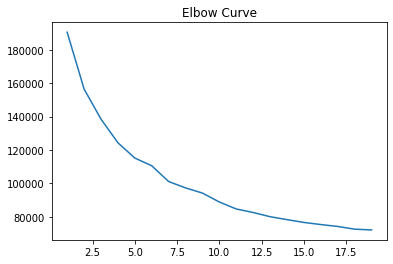

In [27]:
plt.plot(pd.DataFrame(score_1)[0], pd.DataFrame(score_1)[1])
plt.title("Elbow Curve")

In [28]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(datos_scaled)

In [29]:
y_kmeans = kmeans.predict(datos_scaled)
data_clean['Cluster']       = y_kmeans
datos_scaled              = pd.DataFrame(datos_scaled)
datos_scaled['Cluster']   = y_kmeans

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


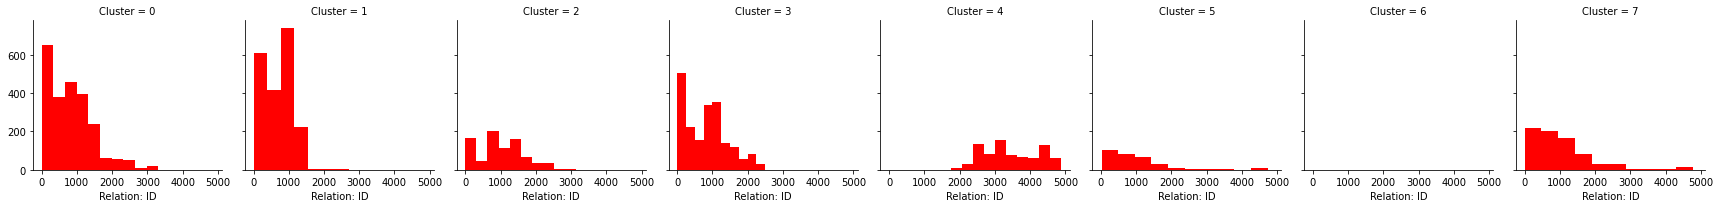

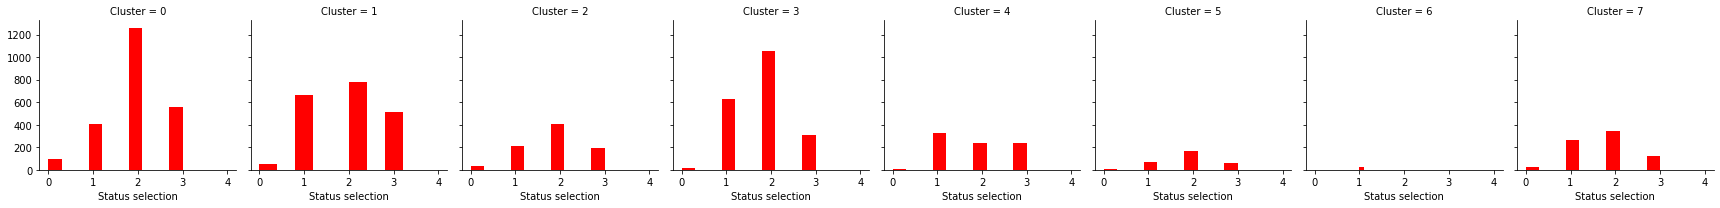

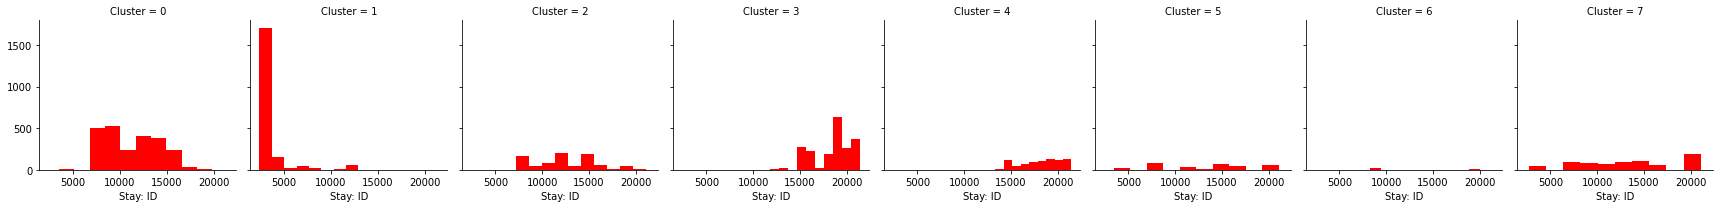

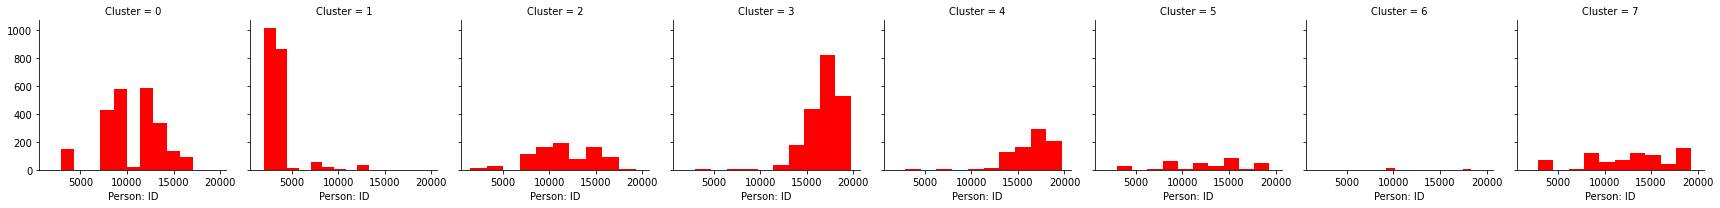

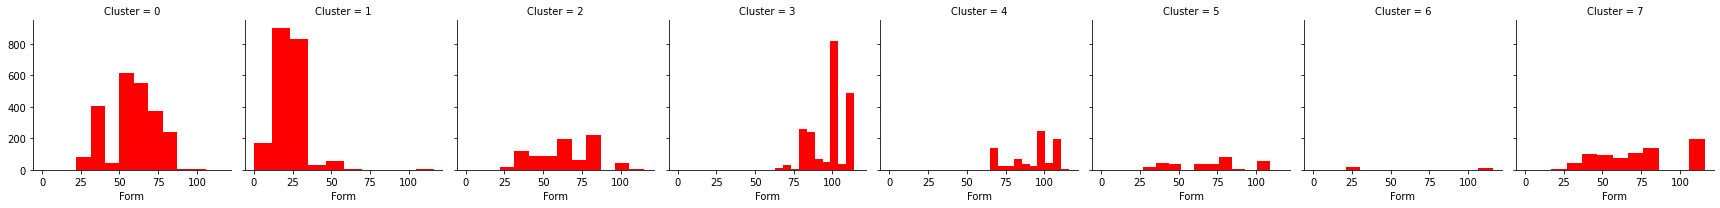

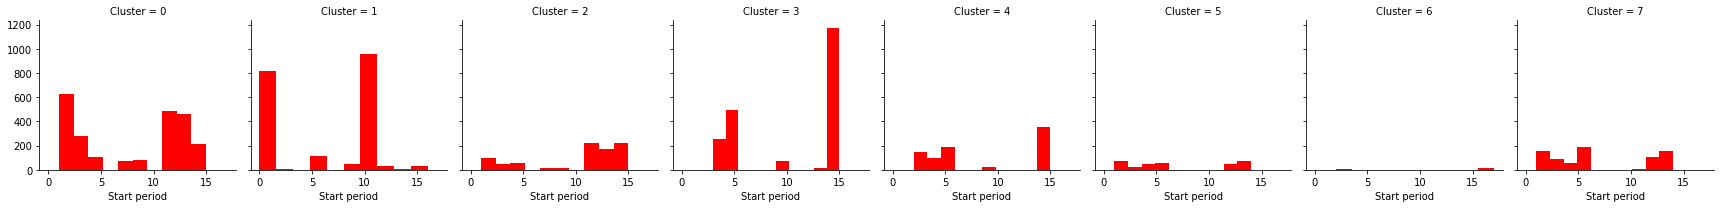

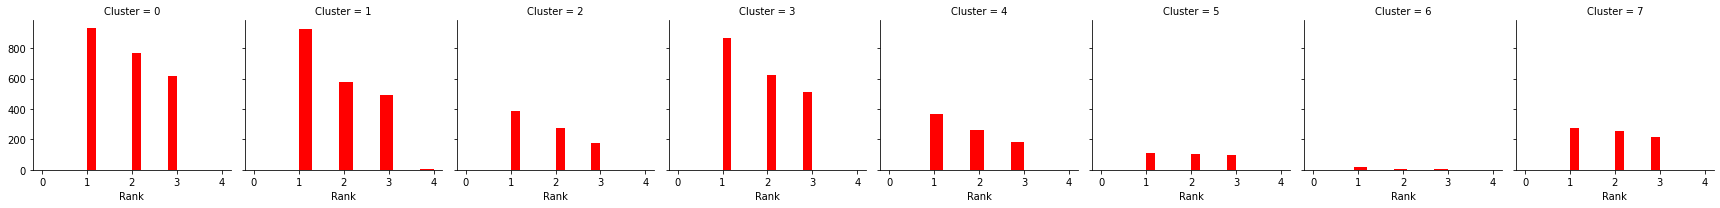

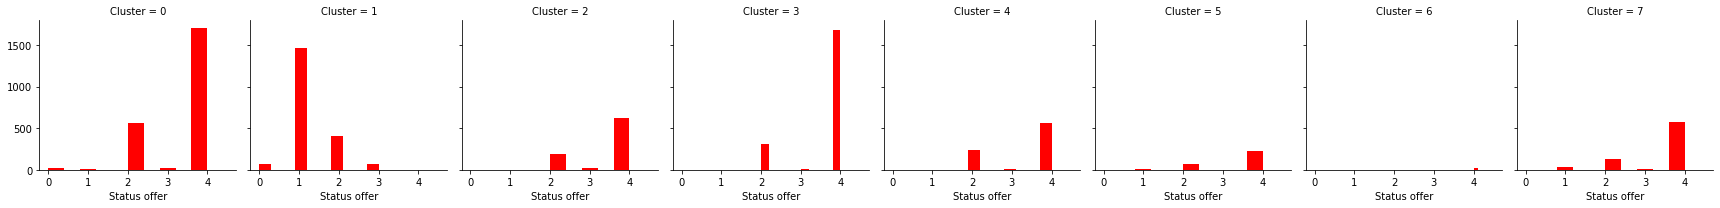

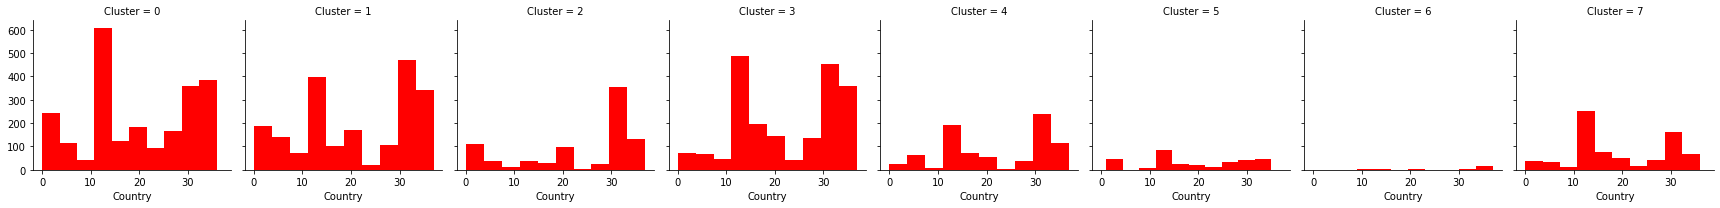

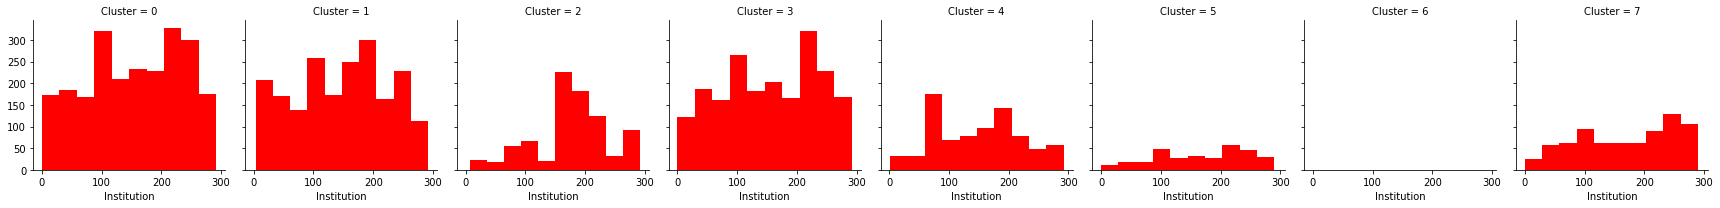

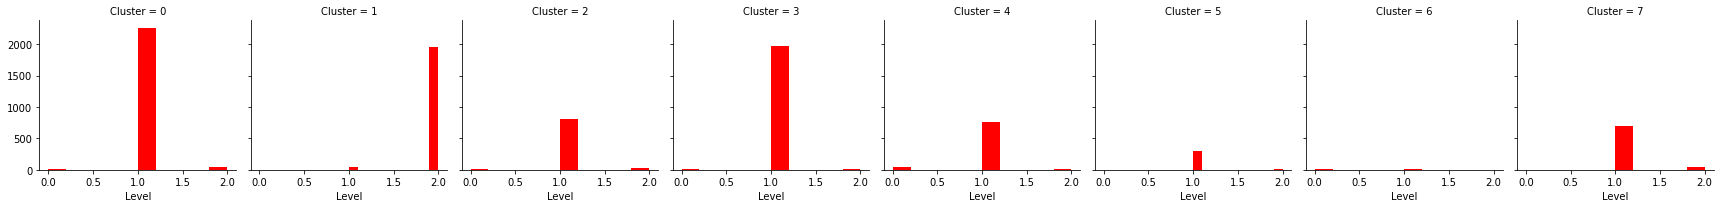

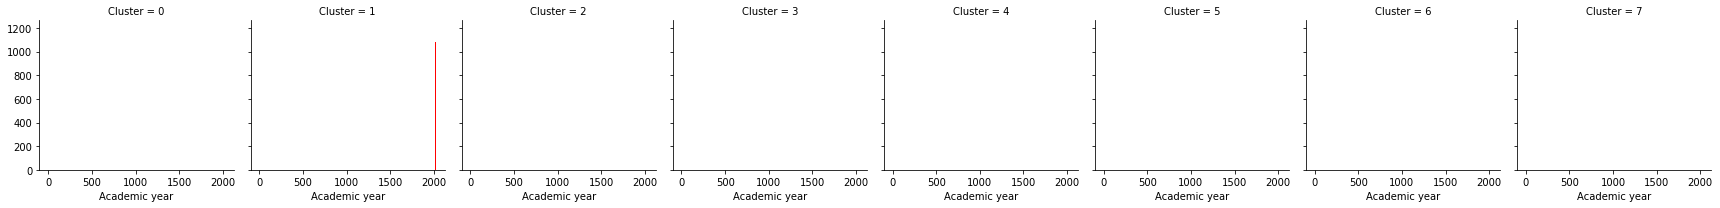

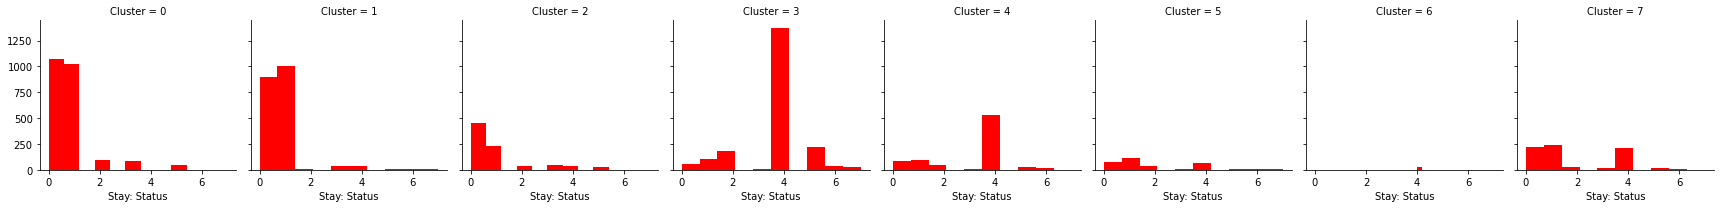

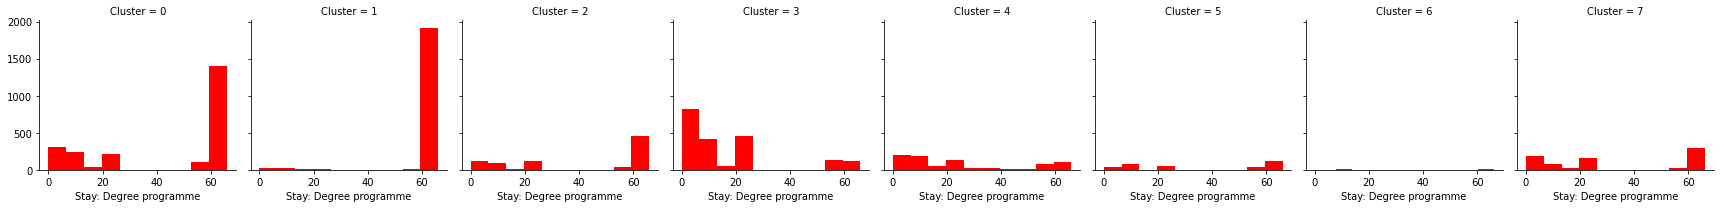

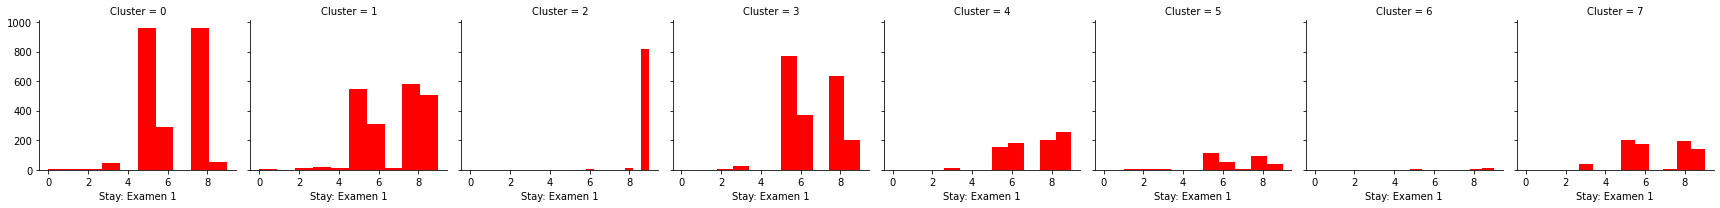

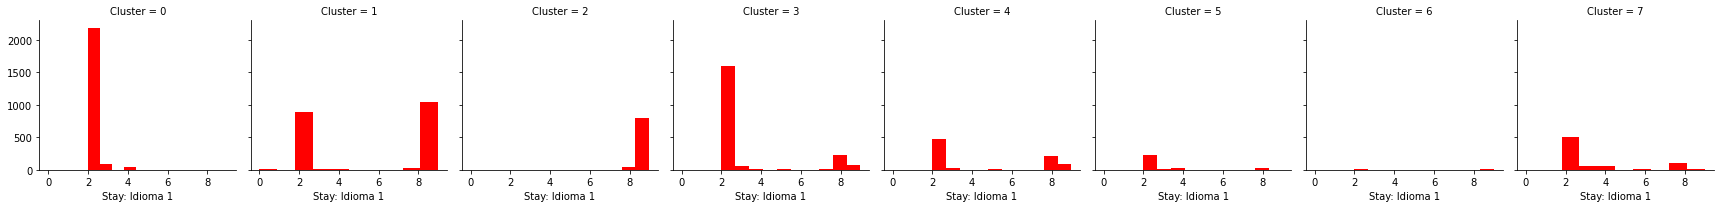

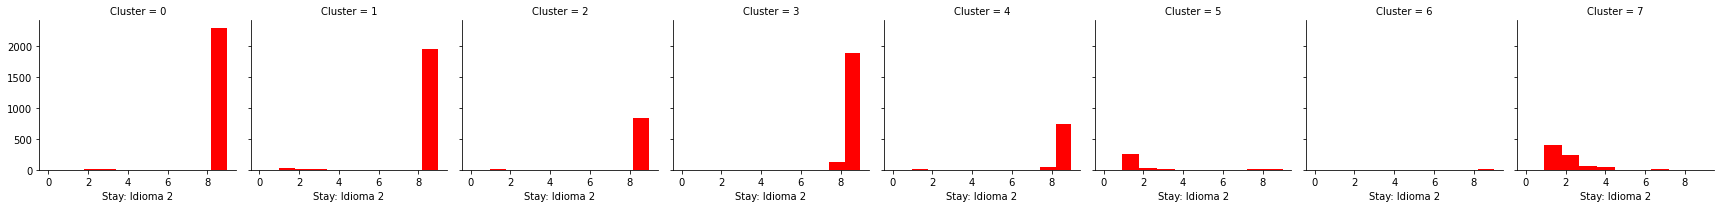

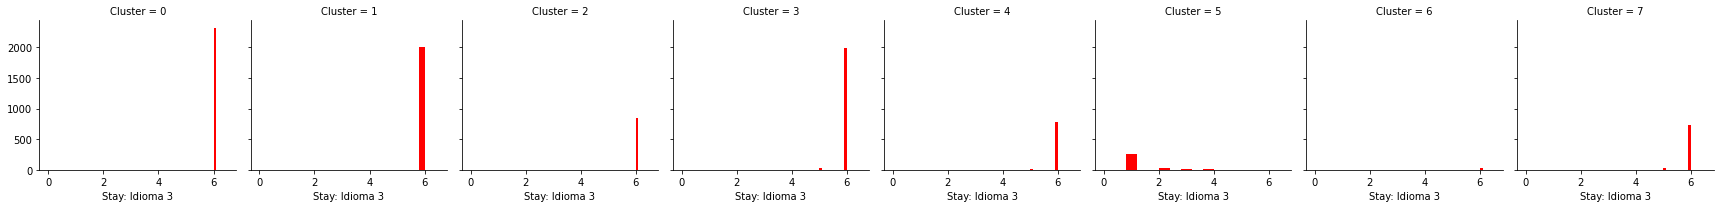

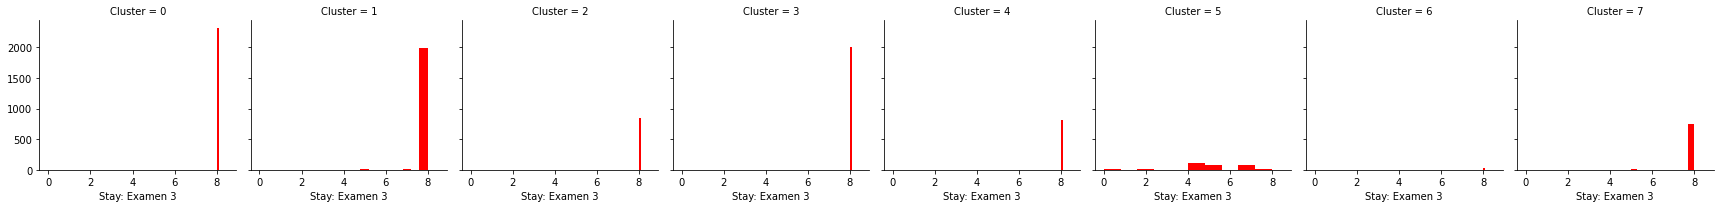

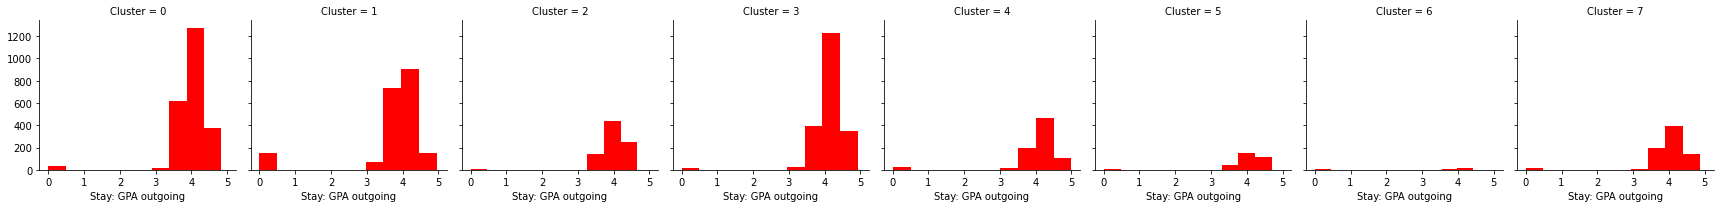

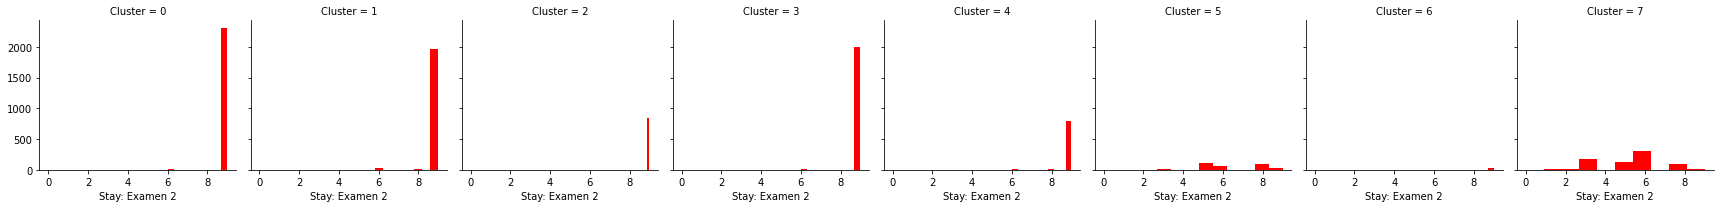

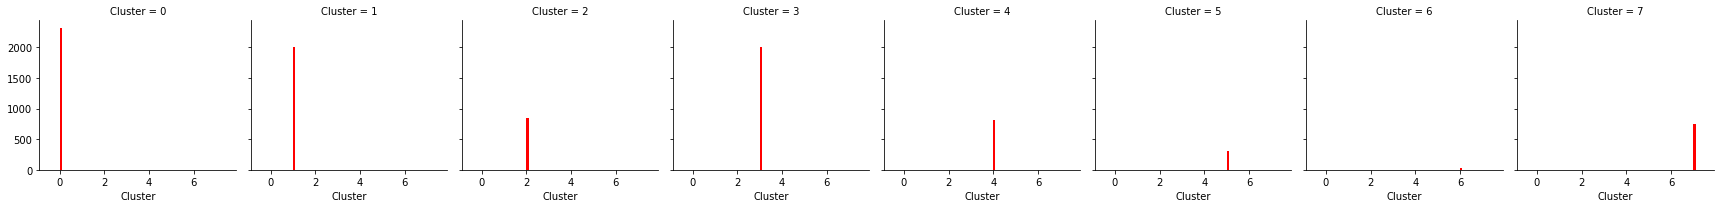

In [30]:
for c in data_clean:
    g   = sns.FacetGrid(data_clean, col='Cluster')
    g.map(plt.hist, c, color = "red")

In [31]:
data_clean["Cluster"].replace({0: 3, 6:5, 7:5, 4:3, 2:3}, inplace=True)
datos_scaled["Cluster"].replace({0: 3, 6:5, 7:5, 4:3, 2:3}, inplace=True)
clusters_   = data_clean["Cluster"]

In [32]:
clusters_.unique()

array([3, 5, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


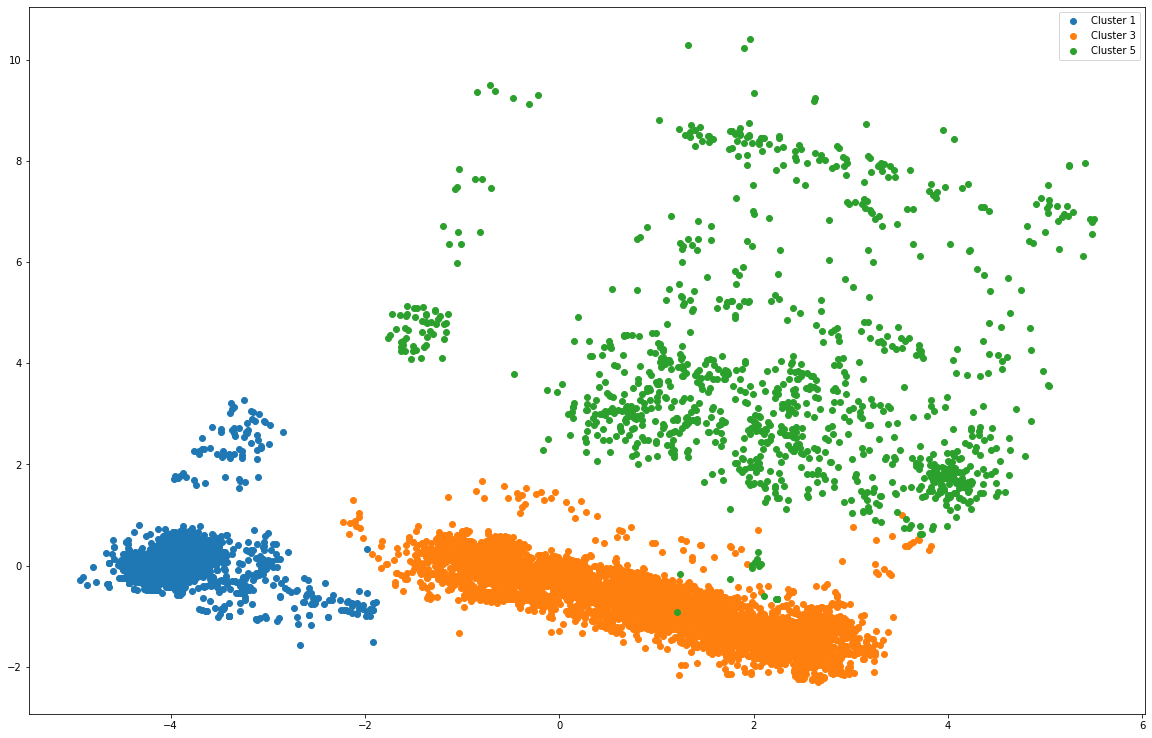

In [33]:
pca = PCA(n_components = 2)
pca.fit(datos_scaled)

scores = pca.transform(datos_scaled)

x,y = scores[:,0] , scores[:,1]
df_data = pd.DataFrame({'x': x, 'y':y, 'clusters':clusters_})
grouping_ = df_data.groupby('clusters')
fig, ax = plt.subplots(figsize=(20, 13))

names = {1: 'Cluster 1', 
         3: 'Cluster 3',
         5: 'Cluster 5',}

for name, grp in grouping_:
    ax.plot(grp.x, grp.y, marker='o', label = names[name], linestyle='')
    ax.set_aspect('auto')

ax.legend()
plt.show()